# Proyecto primer corte

**Grupo 4** 
- Héctor David Cardenas Bautista 
- William Andres Talero 
- Juan camilo Gutierrez
- Manuel Camilo Medina Gonzalez

## Descripcion del dataset

El dataset contiene información de atencion clinica en 130 hospitales en el periodo 1999-2008, de pacientes que cumplieran con las siguientes condiciones: \\
+ Fue una admision hospitalaria. \\
+ Se ingreso al sistema un diagnostico de algún tipo de diabetes. \\
* La duracion de la hospitalisacion fue entre 1 y 14 días. \\
* Se realizaron pruebas de laboratorio. \\
+ Se suministraron medicamentos.  

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from vega_datasets import data

In [13]:
pd.set_option('display.max_columns', None) #Opcion para Mostrar todas las columnas
sns.set(rc={'figure.figsize':(8,8)})

In [5]:
df_diabetic = pd.read_csv('diabetic_data.csv', 
                 sep = ',',
                 index_col=0, #index_col=False
                 error_bad_lines=False,
                 dtype={
                     'patient_nbr': str,
                     'admission_type_id': str,
                     'discharge_disposition_id': str,
                     'admission_source_id': str,
                 })
df_diabetic.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [24]:
df_diabetic.shape

(101766, 49)

Los datos tienen 49 variables entre las cuales esta el codigo del paciente, la edad, la raza, el tiempo de hospitalizacion, numero de pruebas realizadas, numero de diagnosticos, si tiene medicamentos para la diabetes, si tuvo que ser reingresado, etc... además se cuenta con un total de 101.766 observaciones.


### Analisis de datos faltantes

In [28]:
df_NAs = df_diabetic == '?'
(df_NAs.sum()/len(df_NAs))*100

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

+ La variable race, indica la raza y tiene un 2.23% de valores faltantes. 
* La variable weight indica el peso de la persona y tien un 96.86% de datos faltantes
+ La variable payer_code indica la entidad que paga los gastos medicos y cuenta con un 39.56% de datos faltantes
* La variable medical_specialty indica la especialidad del medico que atendio al paciente y cuenta con un 49.08% de datos faltantes. 
+ las variables diag_1, diag_2 y diag_3 indican el codigo del diagnostico en cada instancia presentan 0.02%, 0.35% y 1.39% de datos faltantes respectivamente.

## Analisis descriptivo de las variables cuantitativas

In [6]:
df_diabetic.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## visualización de datos

### Grafico Edad - Tiempo en el hospital


In [7]:
df_DB_H = df_diabetic[df_diabetic['gender']=="Male"]
df_DB_M = df_diabetic[df_diabetic['gender']=="Female"]

print(len(df_DB_H[df_DB_H["readmitted"]=="NO"]))
print(len(df_DB_H[df_DB_H["readmitted"]=="<30"]))
print(len(df_DB_H[df_DB_H["readmitted"]==">30"]))

25823
5205
16027


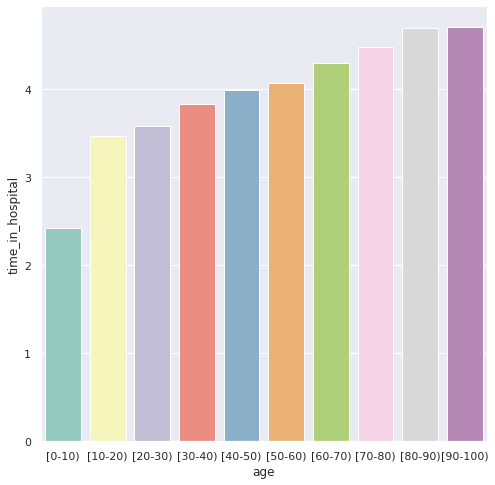

In [14]:
sns.barplot(data = df_DB_H,
            estimator = np.mean,
            x = "age",order=("[0-10)","[10-20)","[20-30)","[30-40)","[40-50)","[50-60)","[60-70)","[70-80)","[80-90)","[90-100)"), 
            y = 'time_in_hospital',palette = "Set3",
            ci = None)

### Graficos Edad - Número de Pruebas de laboratorio y su readmision

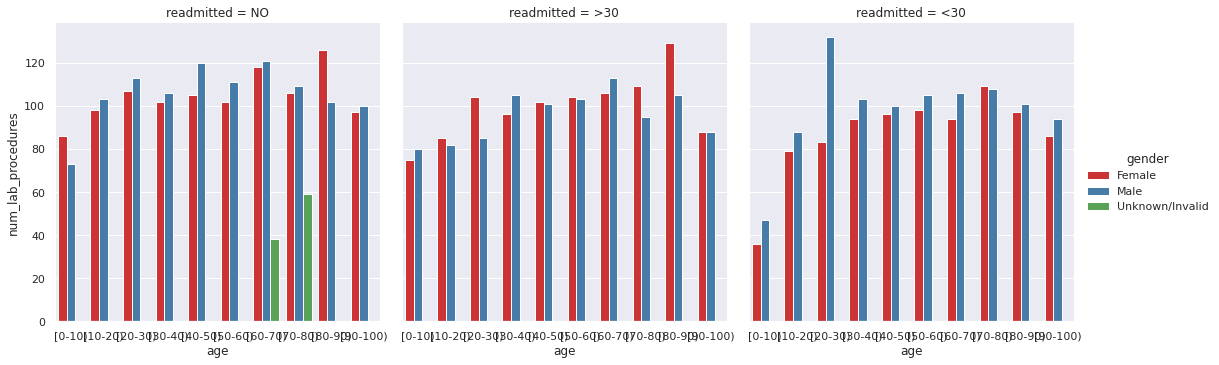

In [19]:
sns.catplot(data = df_diabetic,
            kind = "bar",
            estimator = max,
            x = "age",
            y = "num_lab_procedures",
            hue = "gender",
            col = "readmitted",
            palette = 'Set1',
            ci = None)   

### Graficos Edad - Número de medicamentos contra la diabetes

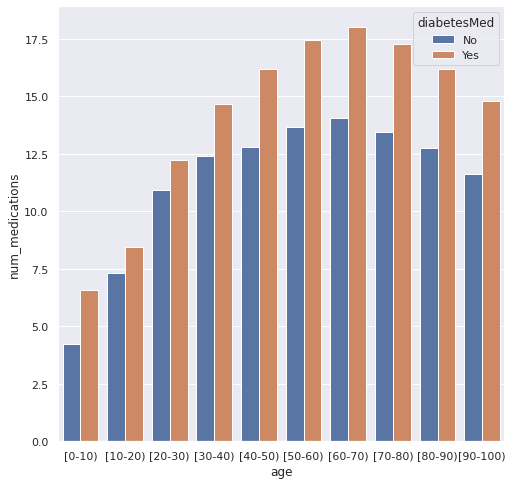

In [17]:
sns.barplot(data = df_diabetic,
            estimator = np.mean,
            x = "age", 
            y = "num_medications",
            hue = "diabetesMed",
            ci = None,)

### Graficos de readmsion - Genero


#### Grafico genero - no readmitidos 

In [34]:
df_diabetic_N = df_diabetic[df_diabetic['readmitted']=="NO"]
df_diabetic_m = df_diabetic[df_diabetic['readmitted']=="<30"]
df_diabetic_M = df_diabetic[df_diabetic['readmitted']==">30"]

tab1 = df_diabetic_N['gender'].value_counts().rename_axis('label').reset_index(name='counts')
tab1

,label,counts
0,Female,29038
1,Male,25823
2,Unknown/Invalid,3


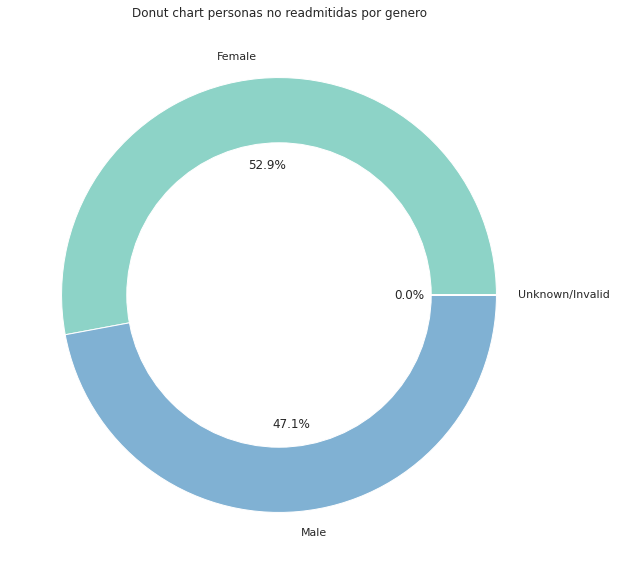

In [29]:
from matplotlib import cm
n = len(tab1['counts'])
colors = [cm.Set3(i / n) for i in range(n)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(tab1['counts'], labels=tab1['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(r'Donut chart personas no readmitidas por genero')
plt.show()

#### Grafico Genero - Readmitidos en menos de 30 días

In [35]:
tab2 = df_diabetic_M['gender'].value_counts().rename_axis('label').reset_index(name='counts')
tab2

,label,counts
0,Female,19518
1,Male,16027


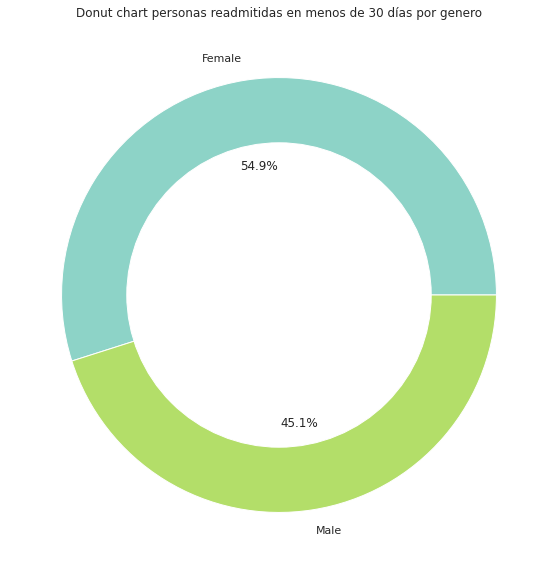

In [30]:
n = len(tab2['counts'])
colors = [cm.Set3(i / n) for i in range(n)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(tab2['counts'], labels=tab2['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(r'Donut chart personas readmitidas en menos de 30 días por genero')
plt.show()

#### Grafico Genero - readmitidos desp'ues de 30 días 

In [36]:
tab3 = df_diabetic_m['gender'].value_counts().rename_axis('label').reset_index(name='counts')
tab3

,label,counts
0,Female,6152
1,Male,5205


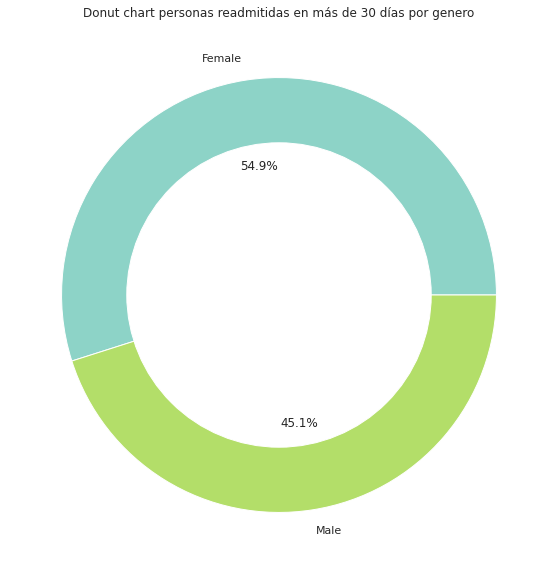

In [31]:
colors = [cm.Set3(i / n) for i in range(n)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(10,10))
plt.pie(tab2['counts'], labels=tab2['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title(r'Donut chart personas readmitidas en más de 30 días por genero')
plt.show()

### Graficos Raza - Readmitidos

#### Grafico Raza - No readmitidos

In [41]:
tab4 = df_diabetic_N['race'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,Caucasian,40383
1,AfricanAmerican,10421
2,?,1547
3,Hispanic,1183
4,Other,915
5,Asian,415


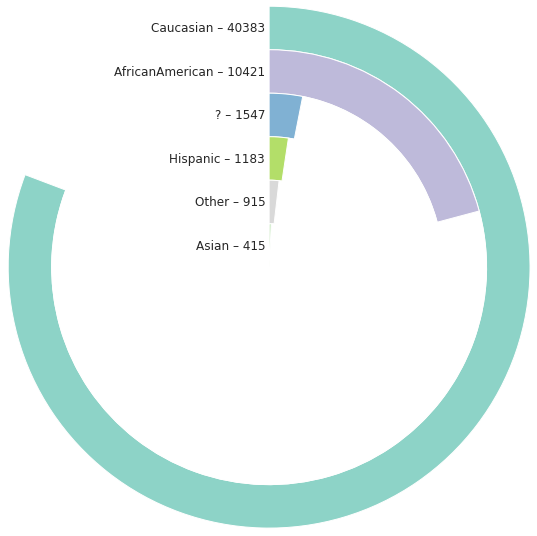

In [42]:
from math import log10

labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
#plt.legend()
plt.show()

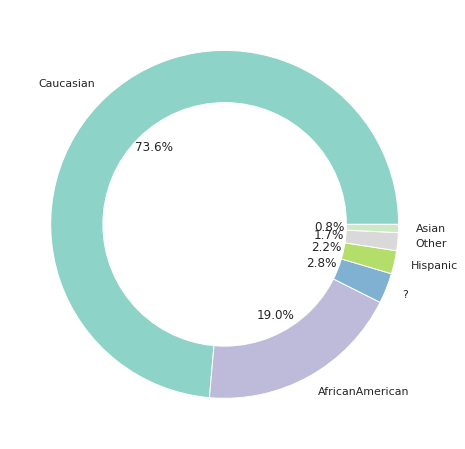

In [43]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(tab4['counts'], labels=tab4['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Grafico Raza - readmitidos en menos de 30 días 

In [44]:
tab4 = df_diabetic_m['race'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,Caucasian,8592
1,AfricanAmerican,2155
2,Hispanic,212
3,?,188
4,Other,145
5,Asian,65


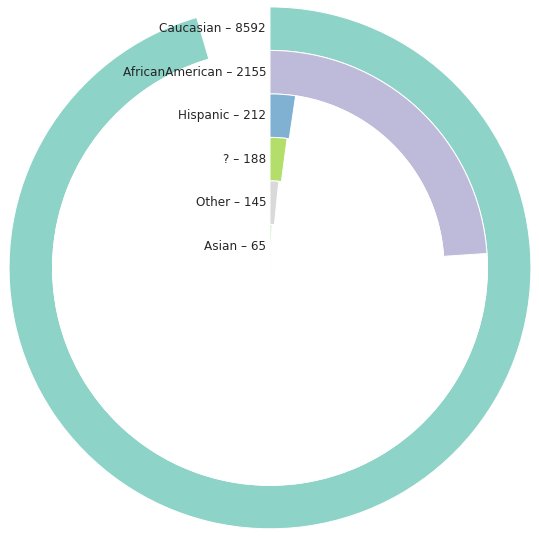

In [45]:
from math import log10

labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
#plt.legend()
plt.show()

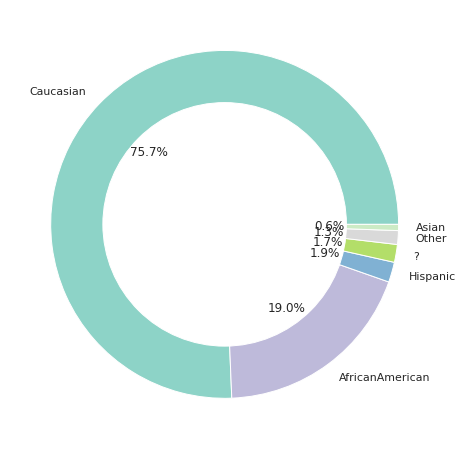

In [46]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(tab4['counts'], labels=tab4['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Grafico Raza - Readmitidos en más de 30 días

In [47]:
tab4 = df_diabetic_M['race'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,Caucasian,27124
1,AfricanAmerican,6634
2,Hispanic,642
3,?,538
4,Other,446
5,Asian,161


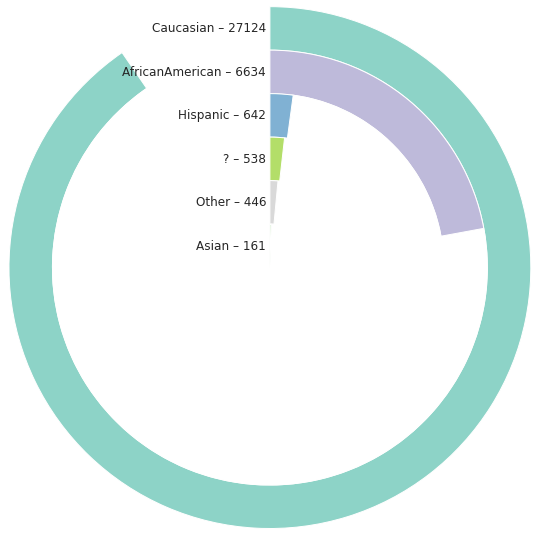

In [49]:
from math import log10

labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
#plt.legend()
plt.show()

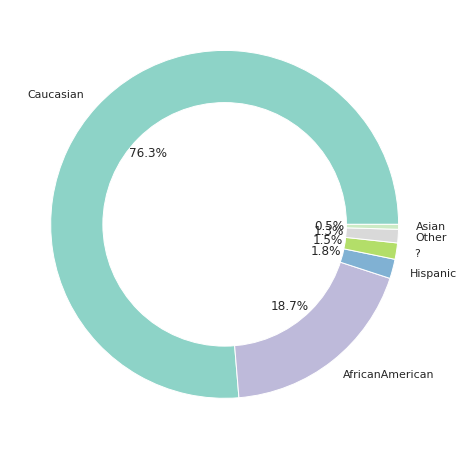

In [48]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(tab4['counts'], labels=tab4['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Graficos Edad - Readmitidos

#### Grafico Edad - No readmitido

In [50]:
tab1 = df_diabetic_N['age'].value_counts().rename_axis('label').reset_index(name='counts')
tab1

,label,counts
0,[70-80),13524
1,[60-70),12084
2,[50-60),9671
3,[80-90),8896
4,[40-50),5380
5,[30-40),2164
6,[90-100),1675
7,[20-30),911
8,[10-20),427
9,[0-10),132


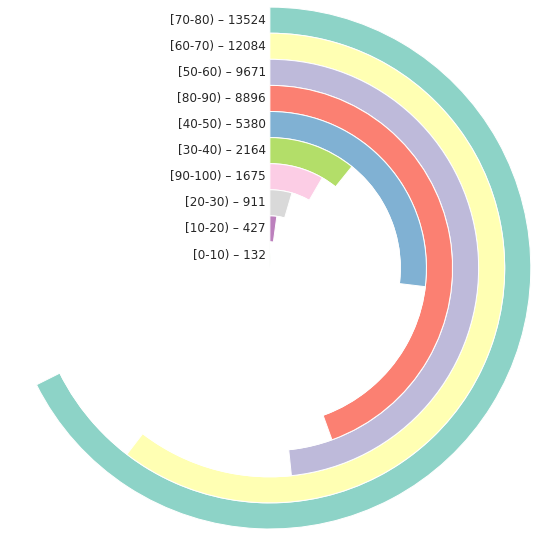

<Figure size 720x720 with 0 Axes>

In [52]:
### Edad - no readmitidos.

labels = tab1['label']
data = tab1['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
plt.figure(figsize=(10,10))

plt.show()

#### Grafico Edad - readmitidos antes de 30 días

In [53]:
tab2 = df_diabetic_M['age'].value_counts().rename_axis('label').reset_index(name='counts')
tab2

,label,counts
0,[70-80),9475
1,[60-70),7897
2,[80-90),6223
3,[50-60),5917
4,[40-50),3278
5,[30-40),1187
6,[90-100),808
7,[20-30),510
8,[10-20),224
9,[0-10),26


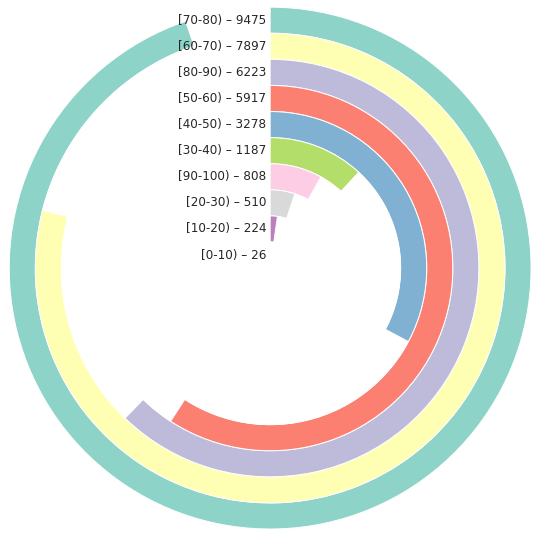

<Figure size 720x720 with 0 Axes>

In [54]:
### Edad - readmitidos en menos de 30 dias

labels = tab2['label']
data = tab2['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
plt.figure(figsize=(10,10))

plt.show()

#### Graficos Edad - Readmitidos despúes de 30 días

In [55]:
tab3 = df_diabetic_m['age'].value_counts().rename_axis('label').reset_index(name='counts')
tab3

,label,counts
0,[70-80),3069
1,[60-70),2502
2,[80-90),2078
3,[50-60),1668
4,[40-50),1027
5,[30-40),424
6,[90-100),310
7,[20-30),236
8,[10-20),40
9,[0-10),3


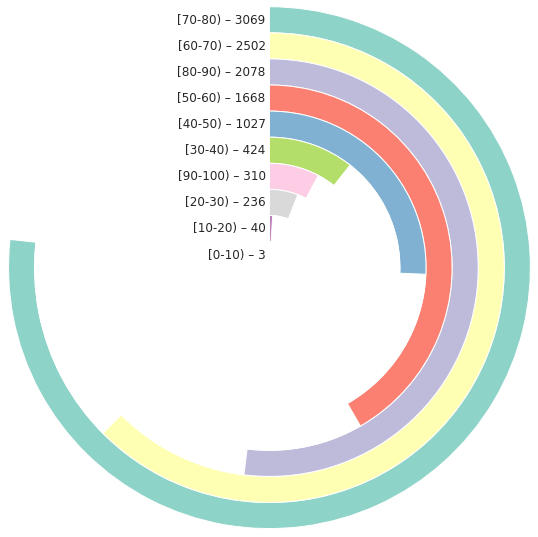

<Figure size 720x720 with 0 Axes>

In [56]:
### Edad - readmitidos en mas de 30 dias

labels = tab3['label']
data = tab3['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.Set3(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
plt.figure(figsize=(10,10))

plt.show()

### Mapa de calor Insulina - readmitidos

In [57]:
tab1 = pd.crosstab(df_diabetic["readmitted"],df_diabetic["insulin"])
tab1

insulin,Down,No,Steady,Up
readmitted,,,,
<30,1698,4756,3433,1470
>30,4752,15949,10482,4362
NO,5768,26678,16934,5484


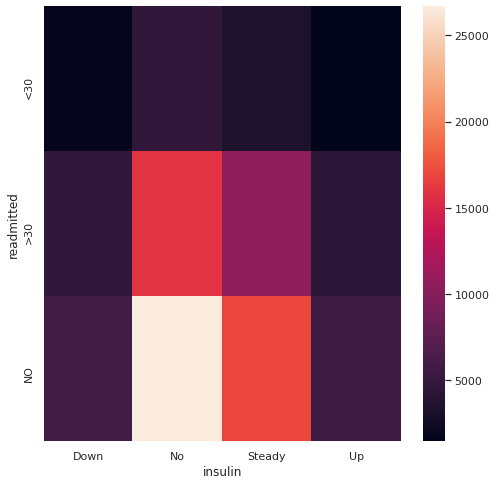

In [58]:
ax = sns.heatmap(tab1)

#Conclusiones

La idea que tenemos es realizar realizar un problema de aprendizaje suervisado, realizando una clasificacion con la variable de readmitidos, empleando para ello las siguientes variables:

1. Raza
2. Genero
3. Edad
4. Tipo de Admision
5. Tiempo en el hospital
6. Número de procedimientos de laboratorio
7. Número de procedimientos distintos de laboratorio
8. Número de medicamentos
9. Número de visitas ambulatorias
10. Número de visitas de emergencia
11. Número de visitas hospitalarias
12. Número de diagnósticos
13. Glucosa
14. Dibetes diagnosticada
15. Readmitido




# Fuente de los datos.


[Enlace para acceder a la fuente](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)